## Polynomial Regression

A sample program to impliment polynomial regression.

Hypothesis function used:  h<sub>&#952;</sub>(x) = &#952;<sub>0</sub> + &#952;<sub>1</sub>X<sub>1</sub> + &#952;<sub>2</sub>X<sup>2</sup><sub>1</sub>

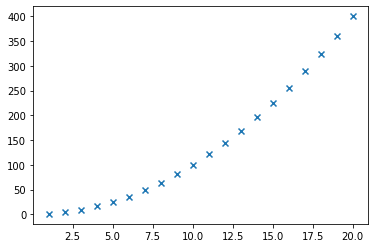

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data set for plotting
x = [i for i in range(1,21)]
y = [i**2 for i in range(1,21)]

#Visualizing Data
plt.scatter(x,y,marker='x')
plt.show()

In [2]:
#Reshaping it to a numpy array and adding the x^2 feature to it
X = np.array(x).reshape(len(x),1)
Xs =np.square(X)
X = np.hstack((X,Xs))
X = X.astype('float64')

In [3]:
mean = [] #To store the mean of each feature
STD = []  #To store the STD of each feature

for i in range(0,X.shape[1]):
    mean.append(np.sum(X[:,i],axis=0)/20)
    STD.append(np.std(X[:,i],ddof=1))
    
    #subtracting the mean from each feature respectively
    X[:,i] -= mean[i]
    #Diving each feature with its STD respectively
    X[:,i] /= STD[i]

In [4]:
#Adding the x0 feature column
X = np.insert(X,0,1,axis=1)

In [5]:
Y = np.array(y).reshape(len(y),1)
m=np.size(Y)

In [6]:
def CostFn(x,y,Theta):
    h = np.dot(x,Theta)
    J = (1/(2*m))*np.sum(np.square(h-y))
    return J

In [7]:
def Gradient_d(x,y,Theta,L):
    
    J_History = []
    iterations = 700
    
    #Applying gradient descent
    for i in range(iterations):
        h = x.dot(Theta)
        J_History.append(CostFn(x,y,Theta))
        Theta = Theta - L*(1/m)*((x.T).dot(h-y))
    return(J_History,Theta)

In [8]:
L = 0.01
theta = np.zeros((3,1))

J,theta = Gradient_d(X,Y,theta,L)
print("Predicted Theta Values:\n",theta)

Predicted Theta Values:
 [[143.37367535]
 [ 52.8552479 ]
 [ 75.04682973]]


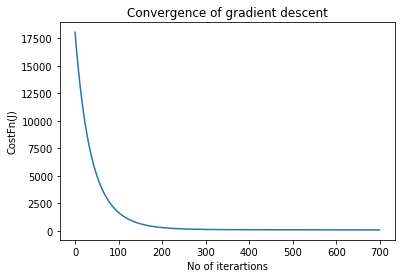

In [9]:
#Visualizing the convergence of gradient descent
plt.plot(J)
plt.xlabel('No of iterartions')
plt.ylabel('CostFn(J)')
plt.title("Convergence of gradient descent")
plt.show()

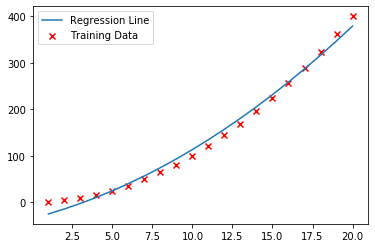

In [10]:
h = np.dot(X,theta)
plt.scatter(x,y,c='red',marker='x',label='Training Data')
plt.plot(x,h,label='Regression Line')
plt.legend()
plt.show()